<img src="./images/shouke_logo.png"
     style="float: right"
     width=100
     style="padding-bottom:100px;"/>
<br>
<br>

<table style="float:center;">
    <tr>
        <td>
            <img src='./images/python-logo.png'width=120>
        </td>
        <td>
            <img src='./images/pandas-logo.png'width=150>
        </td>
        <td>
            <img src='./images/scikit_learn_logo.png'width=150>
        </td>
    </tr>
</table>

<h1 style='text-align: center;'>Machine Learning Linear Regression Models</h1>
<h3 style='text-align: center;'>Shouke Wei, Ph.D. Professor</h3>
<h4 style='text-align: center;'>Email: shouke.wei@gmail.com</h4>

## Objective
- In this section, we will learn how to develop linear regression models using machine learning approach

## 1. Import required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

## 2. Read data

In [2]:
df = pd.read_csv('./data/gdp_china_encoded.csv',index_col=False)
df.head()

,year,gdp,pop,finv,trade,fexpen,uinc,prov_hn,prov_js,prov_sd,prov_zj
0,2000,1.074125,8.650000,0.314513,1.408147,0.108032,0.976157,0.0,0.0,0.0,0.0
1,2001,1.203925,8.733000,0.348443,1.501391,0.132133,1.041519,0.0,0.0,0.0,0.0
2,2002,1.350242,8.842000,0.385078,1.830169,0.152108,1.113720,0.0,0.0,0.0,0.0
3,2003,1.584464,8.963000,0.481320,2.346735,0.169563,1.238043,0.0,0.0,0.0,0.0
4,2004,1.886462,9.052298,0.587002,2.955899,0.185295,1.362765,0.0,0.0,0.0,0.0


## 3. Slice data into features X and target y

In [3]:
X = df.drop(['gdp'],axis=1)
y = df['gdp']

## 4. Split dataset for model training and testing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=1)

## 5. Data Normalization

In [5]:
# MinMaxScaler method
# slice the continous features of training dataset
X_train_continuous = X_train.loc[:,'year':'uinc']
# fit the scaler and transform the training features
min_max_scaler = MinMaxScaler().fit(X_train_continuous)
X_train_continous_scaled = min_max_scaler.transform(X_train_continuous)
# get scaled X_train dataset
X_train_scaled = X_train.copy()
X_train_scaled.loc[:,'year':'uinc'] = X_train_continous_scaled

# slice the continous features of testing dataset
X_test_continuous = X_test.loc[:,'year':'uinc']
# transform the data
X_test_continous_scaled = min_max_scaler.transform(X_test_continuous)
# get scaled X_test dataset
X_test_scaled = X_test.copy()
X_test_scaled.loc[:,'year':'uinc'] = X_test_continous_scaled

## 6. Train the model

### (1)  Define the model and train to fit it

In [6]:
lr = LinearRegression()
model = lr.fit(X_train_scaled, y_train)

### (2) Assess the training

In [7]:
pred_train = model.predict(X_train_scaled)

In [8]:
print(f'R-squared: {r2_score(y_train, pred_train):.3f}')
print(f'Mean absolute error (MAE): {mean_absolute_error(y_train, pred_train):.3f}')
print(f'Mean squared error (MSE): {mean_squared_error(y_train, pred_train):.3f}')
print(f'Root Mean squared error (RMSE): {mean_squared_error(y_train, pred_train, squared=False):.3f}')
print(f'Mean absolute percentage error (MAPE) : {mean_absolute_percentage_error(y_train, pred_train):.3f}')

R-squared: 0.992
Mean absolute error (MAE): 0.181
Mean squared error (MSE): 0.051
Root Mean squared error (RMSE): 0.226
Mean absolute percentage error (MAPE) : 0.079


## 7. Evaluate the model

In [9]:
pred_test = model.predict(X_test_scaled)

In [10]:
print(f'R-squared: {r2_score(y_test, pred_test):.3f}')
print(f'Mean absolute error (MAE): {mean_absolute_error(y_test, pred_test):.3f}')
print(f'Mean squared error (MSE): {mean_squared_error(y_test, pred_test):.3f}')
print(f'Root Mean squared error (RMSE): {mean_squared_error(y_test, pred_test, squared=False):.3f}')
print(f'Mean absolute percentage error (MAPE) : {mean_absolute_percentage_error(y_test, pred_test):.3f}')

R-squared: 0.983
Mean absolute error (MAE): 0.209
Mean squared error (MSE): 0.071
Root Mean squared error (RMSE): 0.266
Mean absolute percentage error (MAPE) : 0.117


## 8. Improve the model

- **Ridge regression**: a type of linear regression that performs L2 regularization by adding a penalty ( the sum of the squares of the coefficients) 
- **Lasso regression**: a type of linear regression that performs L1 regularization by adding a penalty (the sum of the absolute values of the coefficients)

Reference: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

### (1) using lasso regression

In [11]:
from sklearn.linear_model import Lasso

rg = Lasso(alpha=0.001)
rg_model = rg.fit(X_train_scaled, y_train)

### (2) Reassess the training

In [12]:
pred_train = rg_model.predict(X_train_scaled)

In [13]:
print(f'R-squared: {r2_score(y_train, pred_train):.3f}')
print(f'Mean absolute error (MAE): {mean_absolute_error(y_train, pred_train):.3f}')
print(f'Mean squared error (MSE): {mean_squared_error(y_train, pred_train):.3f}')
print(f'Root Mean squared error (RMSE): {mean_squared_error(y_train, pred_train, squared=False):.3f}')
print(f'Mean absolute percentage error (MAPE) : {mean_absolute_percentage_error(y_train, pred_train):.3f}')

R-squared: 0.991
Mean absolute error (MAE): 0.178
Mean squared error (MSE): 0.055
Root Mean squared error (RMSE): 0.234
Mean absolute percentage error (MAPE) : 0.071


### (3) Reevaluate the model 

In [14]:
pred_test = rg_model.predict(X_test_scaled)

print(f'R-squared: {r2_score(y_test, pred_test):.3f}')
print(f'Mean absolute error (MAE): {mean_absolute_error(y_test, pred_test):.3f}')
print(f'Mean squared error (MSE): {mean_squared_error(y_test, pred_test):.3f}')
print(f'Root Mean squared error (RMSE): {mean_squared_error(y_test, pred_test, squared=False):.3f}')
print(f'Mean absolute percentage error (MAPE) : {mean_absolute_percentage_error(y_test, pred_test):.3f}')

R-squared: 0.986
Mean absolute error (MAE): 0.182
Mean squared error (MSE): 0.057
Root Mean squared error (RMSE): 0.239
Mean absolute percentage error (MAPE) : 0.090


### (4) Print the coeffcient and intercept of the model

In [15]:
print(f'Coefficients: {rg.coef_}')
print(f'Intercept: {rg.intercept_}')

Coefficients: [-0.76958049 -0.14648765  2.93727644  3.29993508  3.72734884  1.50994411
  0.56359466  0.47572945  1.08688297  0.20741514]
Intercept: 0.08731636390080233


### (5) Compare prediction results with actual values

In [16]:
actual_pred_compare = pd.DataFrame({'Acutal values':y_test,
                                   'Predicted values':pred_test,
                                   'Errors':y_test-pred_test})
actual_pred_compare

,Acutal values,Predicted values,Errors
40,1.027550,1.411843,-0.384293
31,5.405822,5.520277,-0.114455
46,3.093328,2.885835,0.207493
58,0.689834,0.656864,0.032970
77,0.553301,0.539849,0.013452
49,4.536185,4.317923,0.218262
87,2.693103,2.383621,0.309482
44,2.190019,2.245759,-0.055740
88,2.959931,2.846230,0.113701
90,3.493824,3.647750,-0.153926


## 9. Visulization of the results

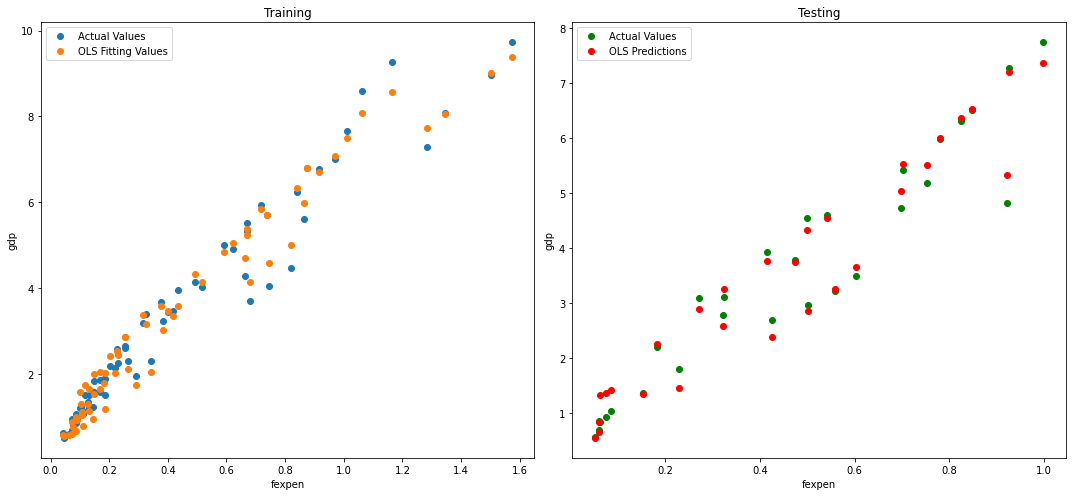

In [17]:
fig, axes = plt.subplots(1,2,figsize=(15,7))

axes[0].plot(X_train['fexpen'], y_train, "o", label="Actual Values")
axes[0].plot(X_train['fexpen'], pred_train, "o", label="OLS Fitting Values")
axes[0].set(xlabel='fexpen', ylabel='gdp', title='Training')
axes[0].legend(loc="best")

axes[1].plot(X_test['fexpen'], y_test,"go", label="Actual Values")
axes[1].plot(X_test['fexpen'], pred_test,"ro", label="OLS Predictions")
axes[1].set(xlabel='fexpen', ylabel='gdp', title='Testing')
axes[1].legend(loc="best")

plt.tight_layout()

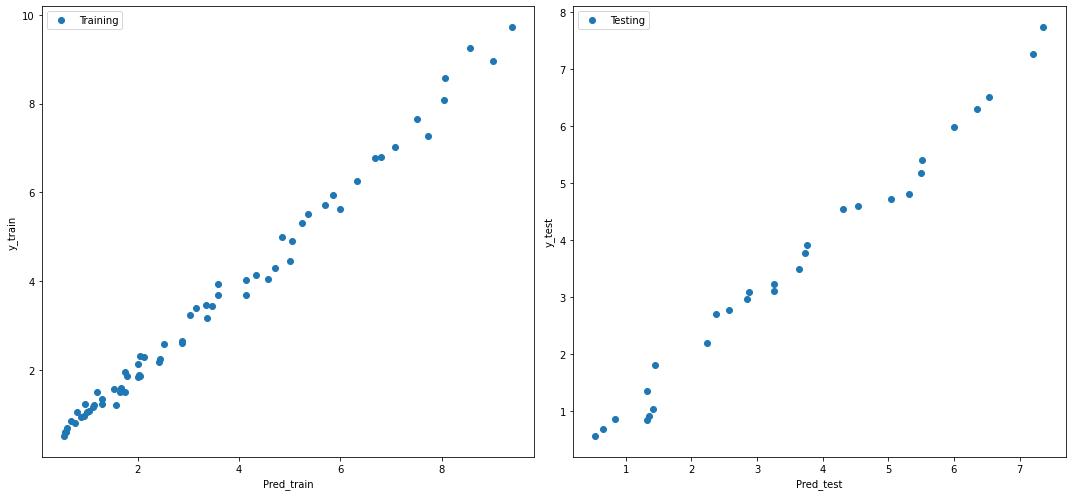

In [18]:
fig, axes = plt.subplots(1,2,figsize=(15,7))

axes[0].plot(pred_train, y_train, "o", label="Training")
axes[0].set_xlabel('Pred_train')
axes[0].set_ylabel('y_train')
axes[0].legend(loc="best")

axes[1].plot(pred_test, y_test,"o", label="Testing")
axes[1].set_xlabel('Pred_test')
axes[1].set_ylabel('y_test')
axes[1].legend(loc="best")

plt.tight_layout()

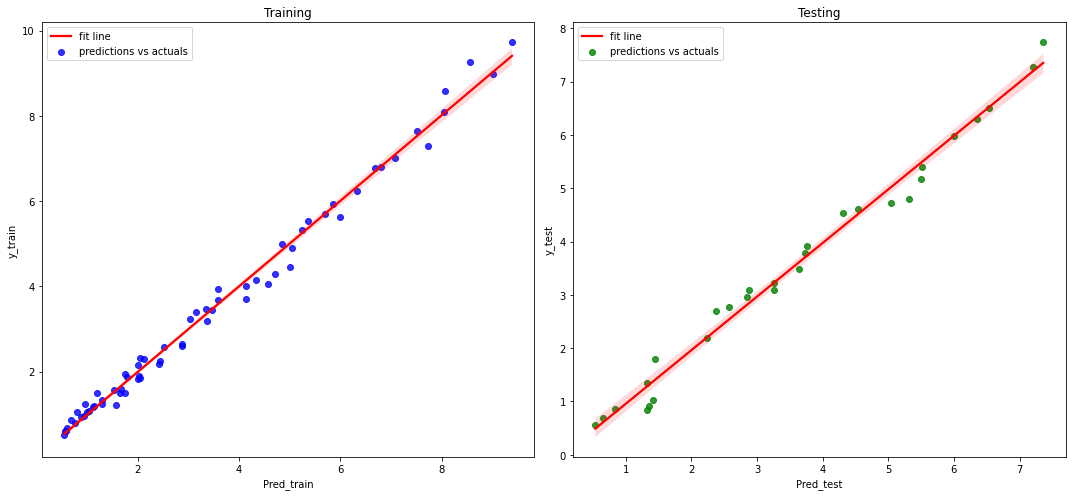

In [19]:
import seaborn as sns

fig, axs = plt.subplots(ncols=2,figsize=(15,7))

sns.regplot(x=pred_train, y=y_train,scatter_kws={"color": "blue"}, 
            line_kws={"color": "red"}, ax=axs[0])
axs[0].set(xlabel='Pred_train', ylabel='y_train', title='Training')
axs[0].legend(('fit line', 'predictions vs actuals'),loc=2)

sns.regplot(x=pred_test, y=y_test,scatter_kws={"color": "green"}, 
            line_kws={"color": "red"},ax=axs[1])
axs[1].set(xlabel='Pred_test', ylabel='y_test', title='Testing')
axs[1].legend(('fit line', 'predictions vs actuals'),loc=2)

plt.tight_layout()

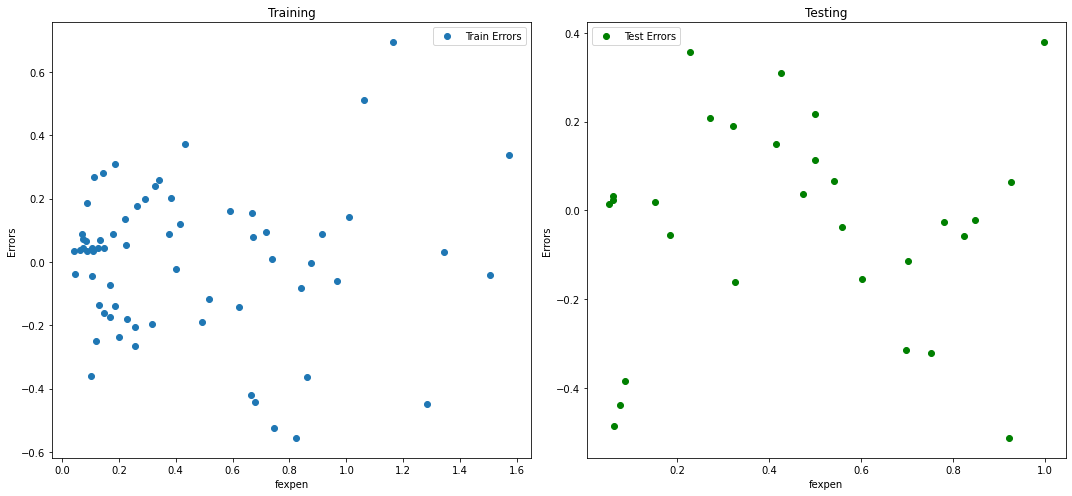

In [20]:
fig, axs = plt.subplots(1,2,figsize=(15,7))

axs[0].plot(X_train.fexpen, y_train-pred_train, "o", label="Train Errors")
axs[0].set(xlabel='fexpen', ylabel='Errors', title='Training')
axs[0].legend(loc="best")

axs[1].plot(X_test.fexpen, y_test-pred_test,"go", label="Test Errors")
axs[1].set(xlabel='fexpen', ylabel='Errors', title='Testing')
axs[1].legend(loc="best")

plt.tight_layout()